Do your work for these exercises in a jupyter notebook named scaling. Use the telco dataset. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import env

from sklearn.model_selection import train_test_split
import sklearn.preprocessing

In [2]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

query = """
select * 
from customers;
"""

In [3]:
df = pd.read_sql(query, get_connection('telco_churn'))
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


Lets prep and read the data real quick.

In [4]:
df.shape
# 7043 rows and 21 columns

(7043, 21)

In [5]:
df.describe()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,1.872923,1.690473,2.315633,64.761692
std,0.368612,24.559481,0.737796,0.833755,1.148907,30.090047
min,0.000000,0.000000,1.000000,1.000000,1.000000,18.250000
25%,0.000000,9.000000,1.000000,1.000000,1.000000,35.500000
50%,0.000000,29.000000,2.000000,1.000000,2.000000,70.350000
75%,0.000000,55.000000,2.000000,2.000000,3.000000,89.850000
max,1.000000,72.000000,3.000000,3.000000,4.000000,118.750000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [7]:
# we only need continuous data not categorical for scaling purposes
features = [
    'customer_id',
    'tenure',
    'monthly_charges',
    'total_charges'
]
df = df[features]
df = df.set_index("customer_id")
df.head()

,tenure,monthly_charges,total_charges
customer_id,,,
0002-ORFBO,9,65.6,593.3
0003-MKNFE,9,59.9,542.4
0004-TLHLJ,4,73.9,280.85
0011-IGKFF,13,98.0,1237.85
0013-EXCHZ,3,83.9,267.4


In [8]:
# the shape before was : 
    # 7043 rows and 21 columns
    
df.shape

(7043, 3)

In [9]:
# are there any nulls?
df.isna().sum()
# not according to this

tenure             0
monthly_charges    0
total_charges      0
dtype: int64

In [10]:
df.value_counts()
# I see some blanks!

tenure  monthly_charges  total_charges
1       20.20            20.2             11
        19.75            19.75             9
        19.65            19.65             8
        19.90            19.9              8
        20.05            20.05             8
                                          ..
48      82.05            4029.95           1
        83.45            3887.85           1
        91.05            4370.75           1
        95.40            4445.3            1
0       19.70                              1
Length: 6789, dtype: int64

In [11]:
# lets replace all blanks with nulls
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [12]:
# Now how many nulls are there?
df.isna().sum()

# looks like there are 11 nulls in total_charges

tenure              0
monthly_charges     0
total_charges      11
dtype: int64

In [13]:
# lets drop those nulls
df = df.dropna()

In [14]:
# Now we just need to fix total_charges dtype
df['total_charges'] = df.total_charges.astype('float')

In [15]:
# Now how many nulls are there?
df.isna().sum()
# woohoo! no nulls or blank cells!

tenure             0
monthly_charges    0
total_charges      0
dtype: int64

In [16]:
df.info()
# the amount of Non-Null's in each column are the same!

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           7032 non-null   int64  
 1   monthly_charges  7032 non-null   float64
 2   total_charges    7032 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 219.8+ KB


In [17]:
# Our shape went from:
    # 7043 rows and 21 columns to
    # 7043 rows and 3 columns to:
    
df.shape

(7032, 3)

In [18]:
def split_data(df, stratify_by=""):
    '''
    take in a DataFrame and return train, validate, and test DataFrames.
    return train, validate, test DataFrames.
    '''
    train, test = train_test_split(df, test_size=.2, random_state=1234)
    train, validate = train_test_split(train, 
                                       test_size=.3, 
                                       random_state=1234)
    return train, validate, test

In [19]:
train, validate, test = split_data(df, stratify_by="tax_value")
train.head()

,tenure,monthly_charges,total_charges
customer_id,,,
5047-LHVLY,1,50.15,50.15
7188-CBBBA,65,95.50,6153.85
7446-KQISO,45,109.75,4900.65
4652-NNHNY,16,73.85,1284.20
1965-DDBWU,16,89.05,1448.60


Text(0.5, 1.0, 'Distribution of Total Charges')

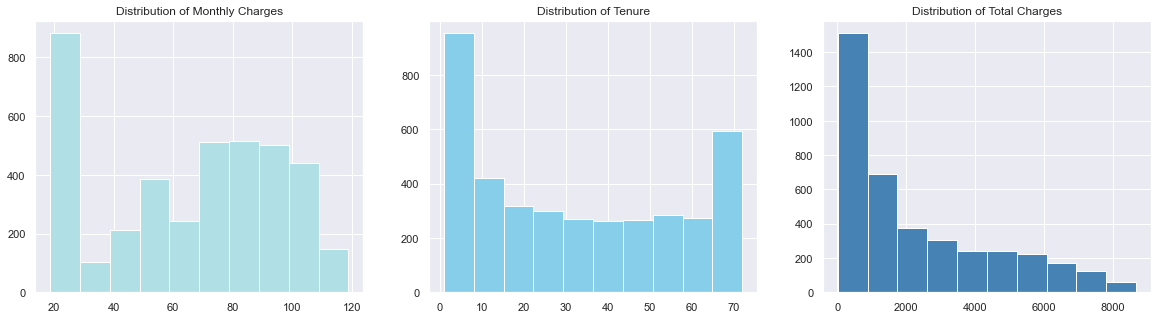

In [20]:
plt.subplots(1, 3, figsize=(20,5), sharey=True)
sns.set(style="darkgrid")
# Monthly Charges
plt.subplot(1,3,1)
plt.hist(data=train, x='monthly_charges', color="powderblue")
plt.title('Distribution of Monthly Charges')

# Tenure
plt.subplot(1,3,2)
plt.hist(data=train, x='tenure', color="skyblue")
plt.title('Distribution of Tenure')

# Total Charges
plt.subplot(1,3,3)
plt.hist(data=train, x='total_charges', color="steelblue")
plt.title('Distribution of Total Charges')

**Now I think we are all good to move to applying the scalers**

1. Apply the scalers we talked about in this lesson to your data and visualize the results in a way that can .

- Do the 3 step sklearn API
    1. Make the thing (make a scaler object)
    2. Fit the thing (on the train data)
    3. Use the thing

In [21]:
# Step 1 Make the thing
scaler = sklearn.preprocessing.MinMaxScaler()

In [22]:
# Fit the thing
scaler.fit(train)

MinMaxScaler()

In [23]:
# Run them
train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

In [24]:
# Clean the thing
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
test_scaled = pd.DataFrame(test_scaled, columns=train.columns)
train_scaled.head()

,tenure,monthly_charges,total_charges
0,0.000000,0.314343,0.003623
1,0.901408,0.767616,0.708955
2,0.619718,0.910045,0.564138
3,0.211268,0.551224,0.146227
4,0.211268,0.703148,0.165225


<AxesSubplot:>

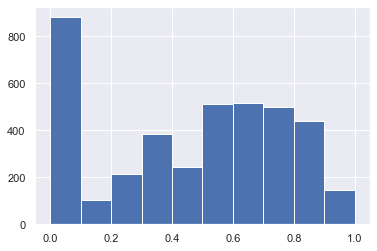

In [25]:
train_scaled.monthly_charges.hist()

Text(0.5, 1.0, 'Distribution of Total Charges')

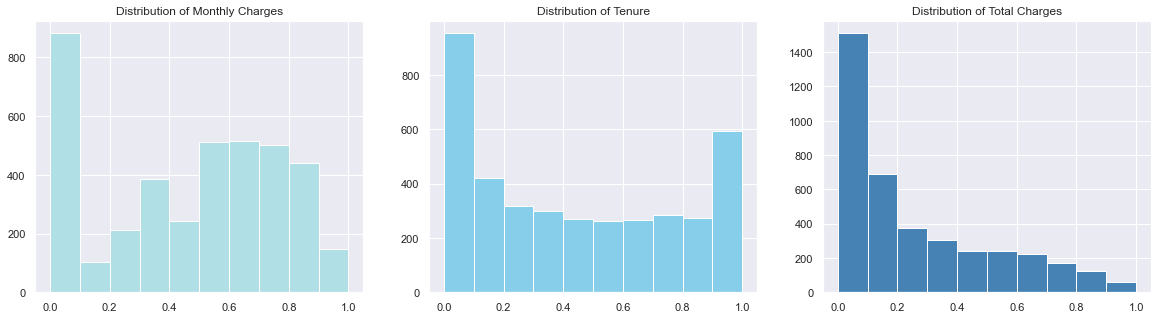

In [26]:
plt.subplots(1, 3, figsize=(20,5), sharey=True)
sns.set(style="darkgrid")
# Monthly Charges
plt.subplot(1,3,1)
train_scaled.monthly_charges.hist(color="powderblue")
plt.title('Distribution of Monthly Charges')

# Tenure
plt.subplot(1,3,2)
train_scaled.tenure.hist(color="skyblue")
plt.title('Distribution of Tenure')

# Total Charges
plt.subplot(1,3,3)
train_scaled.total_charges.hist(color="steelblue")
plt.title('Distribution of Total Charges')

Text(0.5, 1.0, 'Distribution of Tenure')

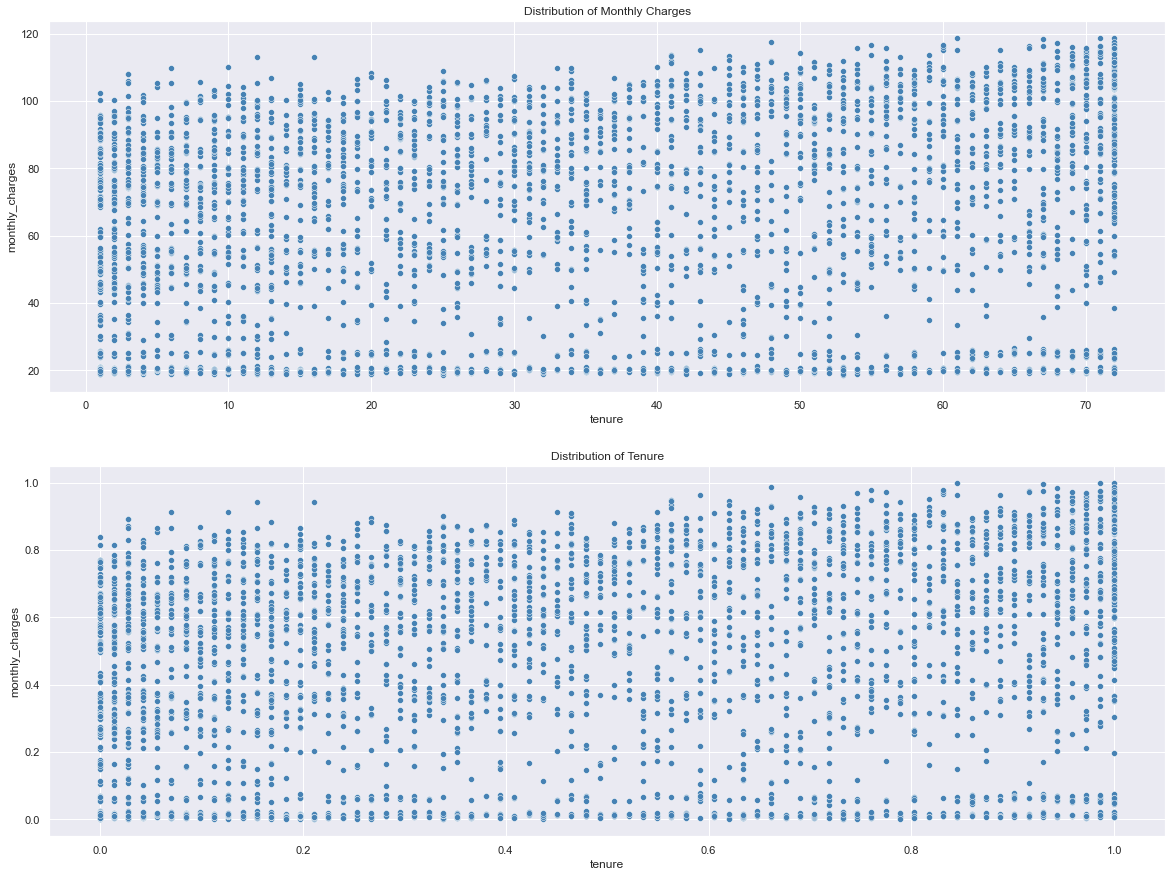

In [27]:
plt.subplots(1, 2, figsize=(20,15), sharey=True)
sns.set(style="darkgrid")
# Monthly Charges
plt.subplot(2,1,1)
sns.scatterplot(x="tenure", y="monthly_charges", color="steelblue", data=train)
plt.title('Distribution of Monthly Charges')

# Tenure
plt.subplot(2,1,2)
sns.scatterplot(x="tenure", y="monthly_charges", color="steelblue", data=train_scaled)
plt.title('Distribution of Tenure')

# holy moly its the same shape
    # shocker

2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [28]:
inversed_df = pd.DataFrame(scaler.inverse_transform(train_scaled))
inversed_df.head()
#Not the same at all

,0,1,2
0,1.0,50.15,50.15
1,65.0,95.50,6153.85
2,45.0,109.75,4900.65
3,16.0,73.85,1284.20
4,16.0,89.05,1448.60


3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html

In [29]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

query = """
select * 
from customers;
"""

In [30]:
test_df = pd.read_sql(query, get_connection('telco_churn'))

In [31]:
features = [
    'customer_id',
    'tenure',
    'monthly_charges',
    'total_charges'
]
test_df = test_df[features]
test_df = test_df.set_index("customer_id")
test_df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
test_df = test_df.dropna()
test_df['total_charges'] = df.total_charges.astype('float')

In [32]:
from sklearn.preprocessing import QuantileTransformer

In [33]:
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

In [34]:
train, validate, test = split_data(df, stratify_by="tax_value")
train.head()

,tenure,monthly_charges,total_charges
customer_id,,,
5047-LHVLY,1,50.15,50.15
7188-CBBBA,65,95.50,6153.85
7446-KQISO,45,109.75,4900.65
4652-NNHNY,16,73.85,1284.20
1965-DDBWU,16,89.05,1448.60


In [35]:
scaler.fit(train)

test_train_scaled = scaler.transform(train)
test_validate_scaled = scaler.transform(validate)
test_test_scaled = scaler.transform(test)
test_train_scaled

array([[-5.19933758, -0.45564031, -1.64436369],
       [ 1.05748501,  0.92233022,  1.38380339],
       [ 0.39249204,  1.88035245,  0.9678409 ],
       ...,
       [ 0.26658359, -1.03364682, -0.33595096],
       [ 0.47380967,  0.00878209,  0.62833467],
       [ 0.24196303,  0.38600821,  0.54833206]])

In [36]:
test_train_scaled = pd.DataFrame(test_train_scaled, columns=train.columns)
test_validate_scaled = pd.DataFrame(test_validate_scaled, columns=train.columns)
test_test_scaled = pd.DataFrame(test_test_scaled, columns=train.columns)

4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

Text(0.5, 1.0, 'Distribution of Total Charges')

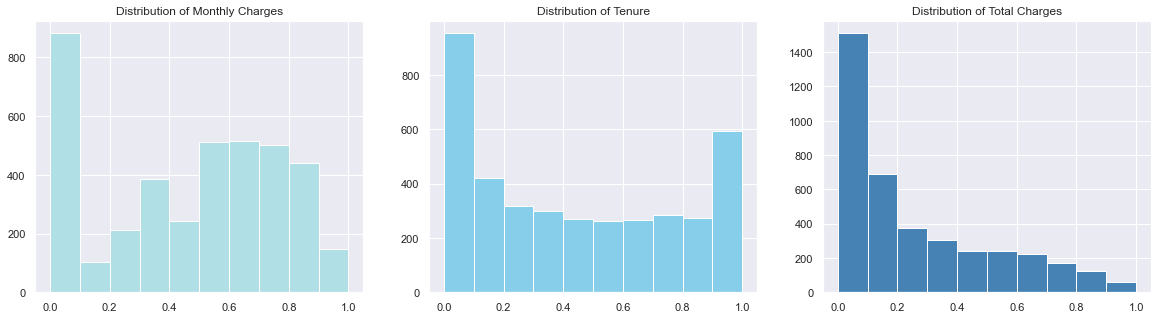

In [37]:
plt.subplots(1, 3, figsize=(20,5), sharey=True)
sns.set(style="darkgrid")
# Monthly Charges
plt.subplot(1,3,1)
train_scaled.monthly_charges.hist(color="powderblue")
plt.title('Distribution of Monthly Charges')

# Tenure
plt.subplot(1,3,2)
train_scaled.tenure.hist(color="skyblue")
plt.title('Distribution of Tenure')

# Total Charges
plt.subplot(1,3,3)
train_scaled.total_charges.hist(color="steelblue")
plt.title('Distribution of Total Charges')

Text(0.5, 1.0, 'Distribution of Total Charges')

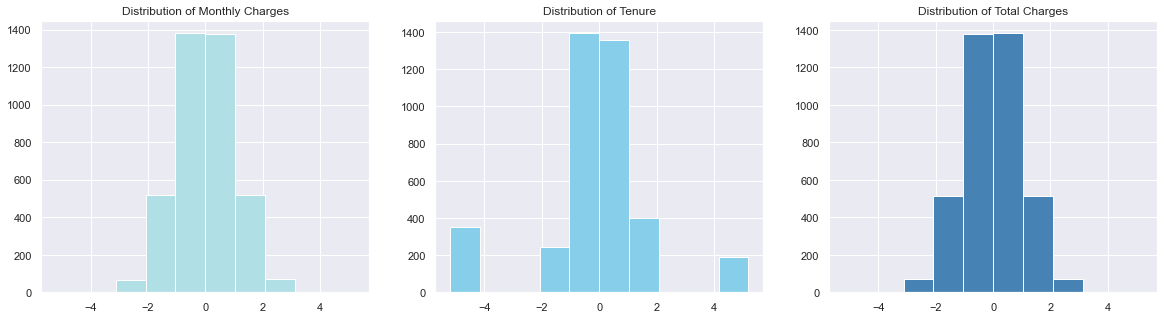

In [38]:
plt.subplots(1, 3, figsize=(20,5), sharey=True)
sns.set(style="darkgrid")
# Monthly Charges
plt.subplot(1,3,1)
test_train_scaled.monthly_charges.hist(color="powderblue")
plt.title('Distribution of Monthly Charges')

# Tenure
plt.subplot(1,3,2)
test_train_scaled.tenure.hist(color="skyblue")
plt.title('Distribution of Tenure')

# Total Charges
plt.subplot(1,3,3)
test_train_scaled.total_charges.hist(color="steelblue")
plt.title('Distribution of Total Charges')

5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [39]:
import prepare

In [40]:
train_scaled = prepare.min_max_scaler(df)
train_scaled.head()

TypeError: min_max_scaler() missing 2 required positional arguments: 'validate' and 'test'

In [ ]:
train_scaled.head()

In [ ]:
train_scaled = prepare.quantile_transformer(df)
train_scaled.head()